En este notebook la idea es aprender lo básico de ASE, previo al trabajo con MACE. Para hacer esto me guiare de la documentación de ASE "https://ase-lib.org/gettingstarted/surface.html" donde hay unos pequeños scripts y un tutorial que te llevan de la mano a conocer que es ASE y como implementarlo para hacer simulaciones atómicas. 

Además se encontraron dos cursos básicos, a los cuales se les puede echar un ojo como material complementario a la práctica:

- https://ase-workshop-2023.github.io/tutorial/
- https://docs.matlantis.com/atomistic-simulation-tutorial/en/1_3_ase_basic.html

Empezaremos con la sección **Nitrogen on copper**

Previo a todo esto, me parece importante definir a ASE:

El "Atomic Simulation Enviroment" ASE por sus siglas, es una libreria de Python creada con el objetivo de configurar, dirigir y analizar simulaciones atomísticas. ASE ha sido construido con una serie de metas u objetivos.

1. **Facil de usar**: ASE puede ser empleado mediate una GUI (graphical user interface), a través de la linea de comandos (bash o CMD) y a través de python.
2. **Flexible**: La implementación de ASE en python la otorga de la flexiblidad del mismo lenguaje, el cual como herramienta logica permite diseñar rutinas que se acomodan al gusto y necesidad del usurio.
3. **Customizable**: ASE se estructura en modulos, cuyos objetivos varian y pueden ser implementados a conveniencia del usuario
4. **Pythonic**
5. **Abierto a participación**

### Introduction: Nitrogen on copper

This section gives a quick (and incomplete) overview of what ASE can do.

We will calculate the adsorption energy of a nitrogen molecule on a copper surface. This is done by calculating the total energy for the isolated slab and for the isolated molecule. The adsorbate is then added to the slab and relaxed, and the total energy for this composite system is calculated. The adsorption energy is obtained as the sum of the isolated energies minus the energy of the composite system.

Here is a picture of the system after the relaxation

![texto alternativo](./Imagenes/surface.png)


In [1]:
from ase import Atoms
from ase.build import add_adsorbate, fcc111
from ase.calculators.emt import EMT
from ase.constraints import FixAtoms
from ase.optimize import QuasiNewton

h = 1.85
d = 1.10

slab = fcc111('Cu', size=(4, 4, 2), vacuum=10.0)

slab.calc = EMT()
e_slab = slab.get_potential_energy()
f_slab = slab.get_forces()

molecule = Atoms('2N', positions=[(0.0, 0.0, 0.0), (0.0, 0.0, d)])
molecule.calc = EMT()
e_N2 = molecule.get_potential_energy()
f_N2 = molecule.get_forces()

add_adsorbate(slab, molecule, h, 'ontop')
constraint = FixAtoms(mask=[a.symbol != 'N' for a in slab])
slab.set_constraint(constraint)


dyn = QuasiNewton(slab, trajectory='N2Cu.traj')
dyn.run(fmax=0.05)

print('Adsorption energy:', e_slab + e_N2 - slab.get_potential_energy())

# print(f"Slab forces := {slab.get_forces()}")
print(f"Initial slab forces := {f_slab}")
print(f"Initial N2 forces := {f_N2}")

from ase.io import read
from ase.visualize import view

traj = read('N2Cu.traj', ':')   # dos puntos = leer toda la trayectoria
view(traj)                     # ver toda la trayectoria
view(traj[-1])                 # sólo la estructura final

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 08:26:08       11.689927       1.0797
BFGSLineSearch:    1[  2] 08:26:08       11.670814       0.4090
BFGSLineSearch:    2[  4] 08:26:08       11.625880       0.0409
Adsorption energy: 0.32351942231763964
Initial slab forces := [[-1.17983558e-15  4.16863972e-15  1.60676480e-01]
 [ 2.23210604e-15 -3.83164480e-15  1.60676480e-01]
 [ 2.13024043e-15  3.42781359e-15  1.60676480e-01]
 [ 1.77548948e-15 -6.31092401e-15  1.60676480e-01]
 [ 7.10802944e-16  3.20663635e-15  1.60676480e-01]
 [-7.70217223e-16  6.34388375e-15  1.60676480e-01]
 [ 3.84950339e-15  2.30024333e-15  1.60676480e-01]
 [ 1.79327039e-15  2.97331604e-15  1.60676480e-01]
 [ 1.59594560e-15 -1.97411532e-15  1.60676480e-01]
 [ 3.18495230e-15 -1.46323925e-15  1.60676480e-01]
 [ 2.70616862e-16 -1.58033309e-15  1.60676480e-01]
 [-8.88178420e-16 -2.66453526e-15  1.60676480e-01]
 [ 4.26741975e-15 -2.86055901e-15  1.60676480e-01]
 [ 7.45264162e-15 

<Popen: returncode: None args: ['c:\\Users\\danie\\AppData\\Local\\Programs\...>

Replica empleando mace.calculators : mace_mp

In [3]:
from mace.calculators import mace_mp

calculo = mace_mp(model="small", device="cpu", default_dtype="float64")

h = 1.85
d = 1.10

slab = fcc111('Cu', size=(4, 4, 2), vacuum=10.0)

slab.calc = calculo
e_slab = slab.get_potential_energy()
f_slab = slab.get_forces()

molecule = Atoms('2N', positions=[(0.0, 0.0, 0.0), (0.0, 0.0, d)])

molecule.calc = calculo
e_N2 = molecule.get_potential_energy()
f_N2 = molecule.get_forces()

add_adsorbate(slab, molecule, h, 'ontop')
constraint = FixAtoms(mask=[a.symbol != 'N' for a in slab])
slab.set_constraint(constraint)
dyn = QuasiNewton(slab, trajectory='N2Cu.traj')
dyn.run(fmax=0.0005)

print('Adsorption energy:', e_slab + e_N2 - slab.get_potential_energy())

print(f"Initial slab forces := {f_slab}")
print(f"Initial N2 forces := {f_N2}")

from ase.io import read
from ase.visualize import view

traj = read('N2Cu.traj', ':')   # dos puntos = leer toda la trayectoria
view(traj)                     # ver toda la trayectoria
view(traj[-1])                 # sólo la estructura final

Using Materials Project MACE for MACECalculator with C:\Users\danie\.cache\mace/20231210mace128L0_energy_epoch249model
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.
Using head Default out of ['Default']


c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\mace\calculators\mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 08:27:52     -133.229211       4.3379
BFGSLineSearch:    1[  2] 08:27:52     -133.278030       1.1596
BFGSLineSearch:    2[  3] 08:27:53     -133.297810       0.2362
BFGSLineSearch:    3[  4] 08:27:53     -133.303037       0.1009
BFGSLineSearch:    4[  5] 08:27:53     -133.303148       0.0163
BFGSLineSearch:    5[  6] 08:27:54     -133.303149       0.0010
BFGSLineSearch:    6[  8] 08:27:54     -133.303149       0.0000
Adsorption energy: 0.409857082697215
Initial slab forces := [[-5.77608707e-16 -2.74519990e-16  2.18665912e-01]
 [ 5.81945516e-17  1.24802512e-15  2.18665912e-01]
 [-1.18557508e-16 -1.39428399e-16  2.18665912e-01]
 [-3.89770681e-17 -8.01225405e-17  2.18665912e-01]
 [ 6.14130622e-16  1.74491498e-15  2.18665912e-01]
 [ 1.52059355e-17  9.60928385e-16  2.18665912e-01]
 [ 4.97919848e-16  1.22406425e-15  2.18665912e-01]
 [ 7.59564937e-16  1.49066957e-15  2.18665912e-01]
 [-5.69206141e-17  

<Popen: returncode: None args: ['c:\\Users\\danie\\AppData\\Local\\Programs\...>

In [4]:
from mace.calculators import mace_mp

calculo = mace_mp(model="small", device="cpu", default_dtype="float64")

h = 1.85
d = 1.10

slab = fcc111('Cu', size=(4, 4, 2), vacuum=10.0)

slab.calc = calculo
e_slab = slab.get_potential_energy()
f_slab = slab.get_forces()

molecule = Atoms('O', positions=[(0.0, 0.0, h)])

molecule.calc = calculo
e_N2 = molecule.get_potential_energy()
f_N2 = molecule.get_forces()

add_adsorbate(slab, molecule, h, 'ontop')
constraint = FixAtoms(mask=[a.symbol != 'O' for a in slab])
slab.set_constraint(constraint)
dyn = QuasiNewton(slab, trajectory='N2Cu.traj')
dyn.run(fmax=0.0005)

print('Adsorption energy:', e_slab + e_N2 - slab.get_potential_energy())

print(f"Initial slab forces := {f_slab}")
print(f"Initial N2 forces := {f_N2}")

from ase.io import read
from ase.visualize import view

traj = read('N2Cu.traj', ':')   # dos puntos = leer toda la trayectoria
view(traj)                     # ver toda la trayectoria
view(traj[-1])                 # sólo la estructura final

Using Materials Project MACE for MACECalculator with C:\Users\danie\.cache\mace/20231210mace128L0_energy_epoch249model
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.
Using head Default out of ['Default']


c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\mace\calculators\mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 08:28:07     -120.579348       0.5386
BFGSLineSearch:    1[  2] 08:28:08     -120.589365       0.0175
BFGSLineSearch:    2[  3] 08:28:08     -120.589375       0.0010
BFGSLineSearch:    3[  4] 08:28:08     -120.589375       0.0000
Adsorption energy: 2.2672144549107713
Initial slab forces := [[-5.77608707e-16 -2.74519990e-16  2.18665912e-01]
 [ 5.81945516e-17  1.24802512e-15  2.18665912e-01]
 [-1.18557508e-16 -1.39428399e-16  2.18665912e-01]
 [-3.89770681e-17 -8.01225405e-17  2.18665912e-01]
 [ 6.14130622e-16  1.74491498e-15  2.18665912e-01]
 [ 1.52059355e-17  9.60928385e-16  2.18665912e-01]
 [ 4.97919848e-16  1.22406425e-15  2.18665912e-01]
 [ 7.59564937e-16  1.49066957e-15  2.18665912e-01]
 [-5.69206141e-17  9.10729825e-17  2.18665912e-01]
 [ 7.42678488e-17  3.40222642e-16  2.18665912e-01]
 [ 8.94195742e-17  4.84150480e-16  2.18665912e-01]
 [-7.36986427e-17  6.40329803e-16  2.18665912e-01]
 [ 1.5

<Popen: returncode: None args: ['c:\\Users\\danie\\AppData\\Local\\Programs\...>

### Atoms
The `Atoms` object is a collection of atoms. Here is how to define a N2 molecule by directly specifying the position of two nitrogen atoms:

In [5]:
from ase import Atoms
d = 1.10
molecule = Atoms('2N', positions=[(0., 0., 0.), (0., 0., d)])

You can also build crystals using, for example, the lattice module which returns Atoms objects corresponding to common crystal structures. Let us make a Cu (111) surface: 

In [6]:
from ase.build import fcc111
slab = fcc111('Cu', size=(4,4,2), vacuum=10.0)

### Adding calculator
In this overview we use the effective medium theory (EMT) calculator, as it is very fast and hence useful for getting started.

We can attach a calculator to the previously created Atoms objects:

In [7]:
from ase.calculators.emt import EMT
slab.calc = EMT()
molecule.calc = EMT()

and use it to calculate the total energies for the systems by using the get_potential_energy() method from the Atoms class:

In [8]:
e_slab = slab.get_potential_energy()
e_N2 = molecule.get_potential_energy()

### Structure relaxation
Let’s use the QuasiNewton minimizer to optimize the structure of the N2 molecule adsorbed on the Cu surface. First add the adsorbate to the Cu slab, for example in the on-top position:

In [9]:
h = 1.85
add_adsorbate(slab, molecule, h, 'ontop')

In order to speed up the relaxation, let us keep the Cu atoms fixed in the slab by using FixAtoms from the constraints module. Only the N2 molecule is then allowed to relax to the equilibrium structure:

In [10]:
from ase.constraints import FixAtoms
constraint = FixAtoms(mask=[a.symbol != 'N' for a in slab])
slab.set_constraint(constraint)

Now attach the QuasiNewton minimizer to the system and save the trajectory file. Run the minimizer with the convergence criteria that the force on all atoms should be less than some fmax:

In [11]:
from ase.optimize import QuasiNewton
dyn = QuasiNewton(slab, trajectory='N2Cu.traj')
dyn.run(fmax=0.05)

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 08:28:29       11.689927       1.0797


BFGSLineSearch:    1[  2] 08:28:29       11.670814       0.4090
BFGSLineSearch:    2[  4] 08:28:29       11.625880       0.0409


True

### Input-output
Writing the atomic positions to a file is done with the write() function:

In [12]:
from ase.io import write
write('slab.xyz', slab)

c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\ase\io\extxyz.py:318: UserWarning: Skipping unhashable information adsorbate_info
  warnings.warn('Skipping unhashable information '


In [13]:
from ase.io import read
slab_from_file = read('slab.xyz')

In [ ]:
read('slab.xyz')      # last configuration
read('slab.xyz', -1)  # same as above
read('slab.xyz', 0)   # first configuration

Atoms(symbols='Cu32N2', pbc=[True, True, False], cell=[[10.210621920333747, 0.0, 0.0], [5.105310960166873, 8.842657971447272, 0.0], [0.0, 0.0, 22.08423447177455]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]), calculator=SinglePointCalculator(...))

In [14]:
from ase.visualize import view
view(slab)

<Popen: returncode: None args: ['c:\\Users\\danie\\AppData\\Local\\Programs\...>

In [15]:
from ase.md.verlet import VelocityVerlet
from ase import units
dyn = VelocityVerlet(molecule, timestep=1.0 * units.fs)
for i in range(10):
    pot = molecule.get_potential_energy()
    kin = molecule.get_kinetic_energy()
    print('%2d: %.5f eV, %.5f eV, %.5f eV' % (i, pot + kin, pot, kin))
    dyn.run(steps=20)

 0: 0.44034 eV, 0.44034 eV, 0.00000 eV
 1: 0.43816 eV, 0.26289 eV, 0.17527 eV
 2: 0.44058 eV, 0.43142 eV, 0.00916 eV
 3: 0.43874 eV, 0.29292 eV, 0.14582 eV
 4: 0.44015 eV, 0.41839 eV, 0.02176 eV
 5: 0.43831 eV, 0.28902 eV, 0.14929 eV
 6: 0.43947 eV, 0.36902 eV, 0.07045 eV
 7: 0.43951 eV, 0.35507 eV, 0.08444 eV
 8: 0.43959 eV, 0.36221 eV, 0.07738 eV
 9: 0.43933 eV, 0.36044 eV, 0.07889 eV


In [16]:
from ase.io import read
from ase.visualize import view

traj = read('N2Cu.traj', ':')   # dos puntos = leer toda la trayectoria
view(traj)                     # ver toda la trayectoria
view(traj[-1])                 # sólo la estructura final


<Popen: returncode: None args: ['c:\\Users\\danie\\AppData\\Local\\Programs\...>

In [17]:
from ase.build import bulk
cu = bulk('Cu', 'fcc', a=3.6)
cu.calc = EMT(); print("EMT Cu bulk:", cu.get_potential_energy()/len(cu))
cu.calc = calculo; print("MACE Cu bulk:", cu.get_potential_energy()/len(cu))


EMT Cu bulk: -0.006688768685791047
MACE Cu bulk: -4.089824886855758


In [18]:
N2 = Atoms('2N', positions=[(0,0,0),(0,0,1.1)], cell=[10,10,10], pbc=True)
N2.calc = EMT(); print("EMT N2:", N2.get_potential_energy())
N2.calc = calculo; print("MACE N2:", N2.get_potential_energy())


EMT N2: 0.440343573035614
MACE N2: -16.414844604929694


In [19]:
from ase.io.trajectory import Trajectory
from ase.optimize import QuasiNewton

dyn = QuasiNewton(slab)

traj = Trajectory('N2Cu_MACE.traj', 'w', slab)
dyn.attach(traj.write, interval=1)   # escribe cada paso

dyn.run(fmax=0.05, steps=500)


                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 08:31:05       11.625880       0.0409


True

Estas primeras simulaciones representaron un primer acercamiento a la libreria ASE, en este caso se simulo una dinamica de adsorción, donde se intentaba observar si una placa de cobre adsorbia una molecula de $N_2$, al emplear EMT se obtuvo "Adsorption energy: 0.32351942231763964" usando mace_mp se obtuvo "Adsorption energy: 0.409857082697215", lo importante aca es notar que la $E_{ads}$ es mayor qué cero, de donde el sistema prefiere alejar la placa de la molecula, es decir una adsorción desfavorable, esto lo evidenciamos al correr las simulaciones con el método view, donde la distancia final de la molecula resulta mayor que la distancia inicial.

### Atoms and calculators

Ahora pasemos de página y veamos un poco de la estructura básica de la libreria.

ASE permite realizar calculos atomisiticos con diferentes codigos computacionales, en este ejercicio introductorio pasaremos por los conceptos basicos y el flujo de trabajo de ASE y eventualmente calcularemos la curva de ligadura para el $N_2$.

Estos tutoriales usalmente usan el codigo de estructura electronica GPAW (Olga trabajo en esto, el articulo lo subire al github https://arxiv.org/abs/2310.14776). Pueden ser completados igual de bien usando algun otro codigo soportado, sujero a ajustes menores.

### Atoms

Let’s set up a molecule and run a DFT calculation. We can create simple molecules by manually typing the chemical symbols and a guess for the atomic positions in Ångström. For example N2:

In [20]:
# Creación y visualización de una molécula simple

from ase import Atoms
#distancia de 2 A
atoms = Atoms('N2', positions=[[0, 0, -1], [0, 0, 1]])

from ase.visualize import view
view(atoms)

# Guardar la molecula como una Trayectory, archivo .traj propio de ASE

from ase.io import write
write('myatoms.traj', atoms)

Then run the GUI from a terminal:

In [21]:
# $ ase gui myatoms.traj
ase gui .\codes\myatoms.traj

SyntaxError: unexpected character after line continuation character (3405367717.py, line 2)

ASE soporta alguno formatos diferentes, para poder observarlos correr:

"ase info --formats"

Ademas los comandos disponbles se pueden observar a traves

"ase --help"

### Calculators

ASE emplea "calculators" para realizar los calculos de estructura electronica. Los "calculators" son interfaces abstractas para diferentes backends los cuales hacen el computo. Normalmente, lac calculadores llaman codigo extreno de estructura electronica o de campos de fuerza. Para correr un calculo primero debemos crear un "calculator" y luego atarlo al objeto "Atoms". EN los siguientes ejemplos usaremos GPAW and set a few calculation parameters as well:

 **Anotación importante:** El tutorial usa GPAW, pero este solo corre en linux, en mi computador tengo ubuntu a traves de WSL, ahi instale GPAW, pero como este solo cumple el proposito de ser un "Calculator" lo reemplazare con uno de los modelos fundacionales, mace_mp y de una vez podremos observar diferencias

In [22]:
from ase import Atoms
from ase.visualize import view
from mace.calculators import mace_mp

calc = mace_mp(model="small", device="cpu",default_dtype="float64")

atoms = Atoms('N2', positions=[[0, 0, -1], [0, 0, 1]])
view(atoms)
atoms.calc = calc

atoms.center(vacuum=3.0)
print(atoms)

e = atoms.get_potential_energy()
print('Energy', e)
f = atoms.get_forces()
print('Forces')
print(f)

Using Materials Project MACE for MACECalculator with C:\Users\danie\.cache\mace/20231210mace128L0_energy_epoch249model
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.
Using head Default out of ['Default']
Atoms(symbols='N2', pbc=False, cell=[6.0, 6.0, 8.0], calculator=MACECalculator(...))


c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\mace\calculators\mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Energy -7.184635140140685
Forces
[[ 0.          0.          5.50295786]
 [ 0.          0.         -5.50295786]]


Es interesante ver la energía calculada $E = -7.18 $ eV, GPAW empleando "lcao" (localized atomic orbitals, la opcion mas rapida pero menos precisa) dispuso una energia de $E = -5.16$ eV, por otro lado el modo "fd" (real-space grids) establecio una $E = -6.48$ eV.

A diferencia de los calculos realizados con EMT, parece que acá los valores son bastante más parecidos. GPAW resuelve númericamente la ecuación de Kohn-Shams, por lo que en teoria debe ser algo más preciso que MACE, pero definitivamente más lento, en especial para ordenes de miles de cuerpos.

### Binding curve

El punto fuerte de ASE es que las cosas son scriptable. atoms.positions es un array de numpy con las posiciones atomicas

In [23]:
print(atoms.positions)
view(atoms)

[[3. 3. 3.]
 [3. 3. 5.]]


<Popen: returncode: None args: ['c:\\Users\\danie\\AppData\\Local\\Programs\...>

We can move the atoms by adding or assigning other values into some of the array elements. Then we can trigger a new calculation by calling atoms.get_potential_energy() or atoms.get_forces() again.

In [24]:
atoms.positions[1][2] += 1.0

e = atoms.get_potential_energy()
print('Energy', e)
f = atoms.get_forces()
print('Forces')
print(f)

view(atoms)

Energy -5.715353597244501
Forces
[[ 0.          0.          0.03068814]
 [ 0.          0.         -0.03068814]]


<Popen: returncode: None args: ['c:\\Users\\danie\\AppData\\Local\\Programs\...>

Notemos como la energía (aumento, aunque disminuyo en valor absoluto) y a su vez la maginitud de la fuerza mermo, lo esperado al aumentar la distancia 1 A

This way we can implement any series of calculations. When running multiple calculations, we often want to write them into a file. We can use the standard trajectory format to write multiple calculations (atoms and energy) like this:

In [ ]:
from ase.io.trajectory import Trajectory
traj = Trajectory('mytrajectory.traj', 'w')
...
traj.write(atoms)

**Exercise**

Write a loop, displacing one of the atoms in small steps to trace out a binding energy curve $E(d)$ around the equilibrium distance. Save each step to a trajectory and visualize. What is the equilibrium distance?

In [25]:
import numpy as np
from ase.io.trajectory import Trajectory

E = []
d = np.linspace(3.5, 7.5, 100)
atoms.positions[1][2] = 3.5

for i in range(len(d)):

    traj = Trajectory(f'traj_BC/BC_{i}.traj', 'w')

    atoms.positions[1][2] = d[i]
    e = atoms.get_potential_energy()
    E.append(e)
    traj.write(atoms)

Índice mínimo: 15
Distancia en mínimo: 1.1060606060606064 Å
Energía mínima: -16.425408 eV


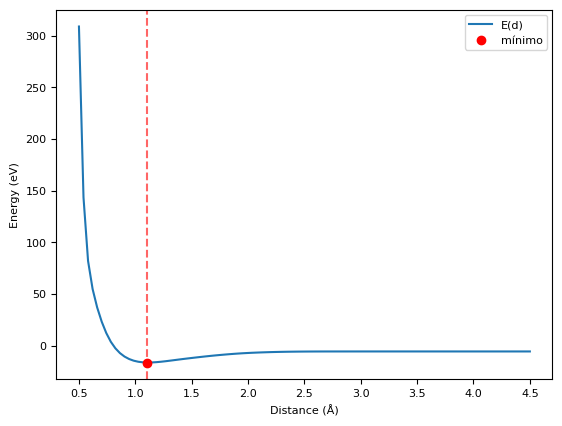

In [26]:
import matplotlib.pyplot as plt
E = np.array(E)
# Encuentra el mínimo de E y su distancia correspondiente en d
idx_min = np.argmin(E)
d_min = d[idx_min] - 3
E_min = E[idx_min]

print(f"Índice mínimo: {idx_min}")
print(f"Distancia en mínimo: {d_min } Å")
print(f"Energía mínima: {E_min:.6f} eV")

# Marcar en la gráfica existente
plt.plot(d-3.0, E, label='E(d)')
plt.scatter([d_min], [E_min], color='red', zorder=5, label='mínimo')
plt.axvline(d_min, color='red', linestyle='--', alpha=0.6)
plt.xlabel('Distance (Å)')
plt.ylabel('Energy (eV)')
plt.legend()
plt.show()

To get a more correct binding energy, set up an isolated N atom and calculate its energy. Then calculate the molecular atomisation energy $E_{atomisation} = E[N_2]-2E[N]$ of the N2 molecule.

You can use atoms.set_initial_magnetic_moments([3]) before triggering the calculation to tell GPAW that your atom is spin polarized.

In [27]:
calc = mace_mp(model="small", device="cpu",default_dtype="float64")

atoms = Atoms('N', positions=[[0, 0, 0]])
atoms.set_initial_magnetic_moments([3])

atoms.calc = calc

atoms.center(vacuum=3.0)
print(atoms)

e_unitario  = atoms.get_potential_energy()
print('Energy', e_unitario)

Using Materials Project MACE for MACECalculator with C:\Users\danie\.cache\mace/20231210mace128L0_energy_epoch249model
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.


c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\mace\calculators\mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Using head Default out of ['Default']
Atoms(symbols='N', pbc=False, cell=[6.0, 6.0, 6.0], initial_magmoms=..., calculator=MACECalculator(...))
Energy -2.8495819265502647


Índice mínimo: 15
Distancia en mínimo: 1.1060606060606064 Å
Energía mínima: -10.726244 eV


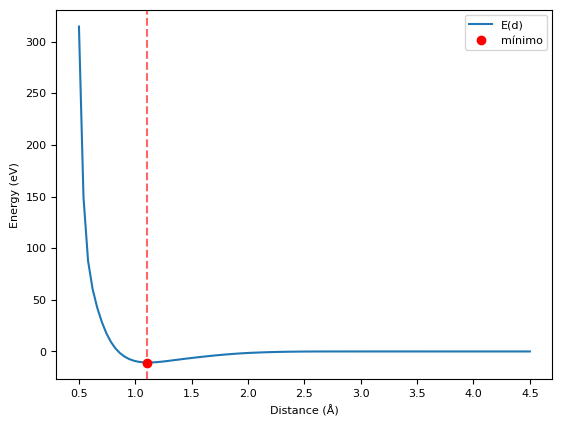

In [28]:
E = np.array(E) - 2 * e_unitario
# Encuentra el mínimo de E y su distancia correspondiente en d
idx_min = np.argmin(E)
d_min = d[idx_min] - 3
E_min = E[idx_min]

print(f"Índice mínimo: {idx_min}")
print(f"Distancia en mínimo: {d_min } Å")
print(f"Energía mínima: {E_min:.6f} eV")

# Marcar en la gráfica existente
plt.plot(d-3.0, E, label='E(d)')
plt.scatter([d_min], [E_min], color='red', zorder=5, label='mínimo')
plt.axvline(d_min, color='red', linestyle='--', alpha=0.6)
plt.xlabel('Distance (Å)')
plt.ylabel('Energy (eV)')
plt.legend()
plt.show()

In [64]:
from math import sqrt

from ase import Atoms

a = 3.55
atoms = Atoms(
    'Ni4',
    cell=[sqrt(2) * a, sqrt(2) * a, 1, 90, 90, 120],
    pbc=(1, 1, 0),
    scaled_positions=[(0, 0, 0), (0.5, 0, 0), (0, 0.5, 0), (0.5, 0.5, 0)],
)
atoms.center(vacuum=5.0, axis=2)

In [40]:
print(atoms.cell)
view(atoms)

Cell([[5.020458146424487, 0.0, 0.0], [-2.5102290732122423, 4.347844293440141, 0.0], [0.0, 0.0, 10.0]])


<Popen: returncode: None args: ['c:\\Users\\danie\\AppData\\Local\\Programs\...>

In [51]:
print(atoms.positions)

[[ 0.          0.          0.        ]
 [ 2.51022907  0.          0.        ]
 [-1.25511454  2.17392215  0.        ]
 [ 1.25511454  2.17392215  0.        ]]


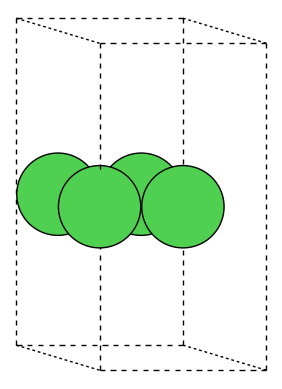

In [53]:
from ase.visualize.plot import plot_atoms

fig, ax = plt.subplots()
plot_atoms(atoms, ax, rotation=('-80x,0y,0z'))
ax.set_axis_off()

### Repeating a structure

Podemos repetir una estructura tridimensionalmente, desde bash:

    ase gui -r 3,3,2 slab.xyz 

Tambien desde python podemos:

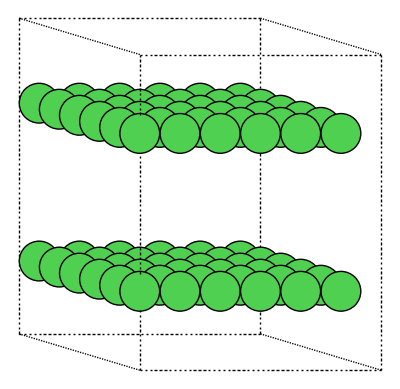

In [54]:
atoms_repeated = atoms.repeat((3, 3, 2))
fig, ax = plt.subplots()
plot_atoms(atoms_repeated, ax, rotation=('-80x,0y,0z'))
ax.set_axis_off()

In [38]:
atoms_rep2 = atoms.repeat((3,3,1))

In [39]:
view(atoms_rep2)
view(atoms_repeated)

<Popen: returncode: None args: ['c:\\Users\\danie\\AppData\\Local\\Programs\...>

### Agregar atomos

Podemos agregar o depositar atomos dadas unas coordenadas relativas a la celda, empleando el metodo

    atoms.append("Objeto")

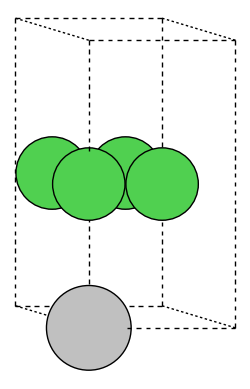

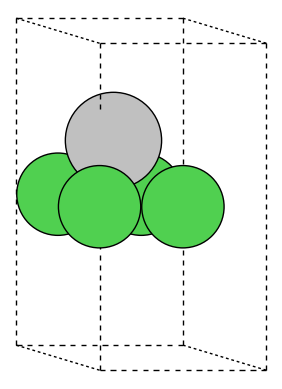

In [65]:
import numpy as np

h = 1.9
relative = (1 / 6, 1 / 6, 0.5)
absolute = np.dot(relative, atoms.cell) + (0, 0, h)
atoms.append('Ag')

fig, ax = plt.subplots()
plot_atoms(atoms, ax, rotation=('-80x,0y,0z'))
ax.set_axis_off()
plt.show()

atoms.positions[-1] = absolute

fig, ax = plt.subplots()
plot_atoms(atoms, ax, rotation=('-80x,0y,0z'))
ax.set_axis_off()
plt.show()

In [67]:
p = np.array(
    [
        [0.27802511, -0.07732213, 13.46649107],
        [0.91833251, -1.02565868, 13.41456626],
        [0.91865997, 0.87076761, 13.41228287],
        [1.85572027, 2.37336781, 13.56440907],
        [3.13987926, 2.3633134, 13.4327577],
        [1.77566079, 2.37150862, 14.66528237],
        [4.52240322, 2.35264513, 13.37435864],
        [5.16892729, 1.40357034, 13.42661052],
        [5.15567324, 3.30068395, 13.4305779],
        [6.10183518, -0.0738656, 13.27945071],
        [7.3856151, -0.07438536, 13.40814585],
        [6.01881192, -0.08627583, 12.1789428],
    ]
)
c = np.array([[8.490373, 0.0, 0.0], [0.0, 4.901919, 0.0], [0.0, 0.0, 26.93236]])
water = Atoms('4(OH2)', positions=p, cell=c, pbc=[1, 1, 0])
water.write('water.traj')

<Popen: returncode: None args: ['c:\\Users\\danie\\AppData\\Local\\Programs\...>

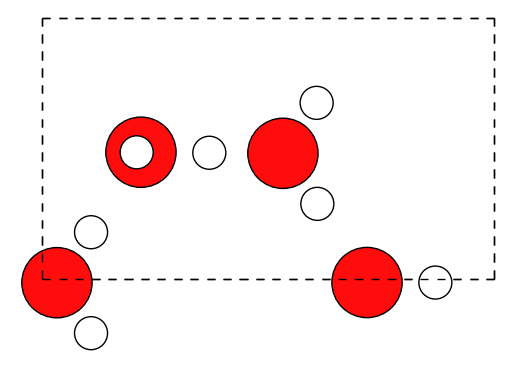

In [69]:
fig, ax = plt.subplots()
plot_atoms(water, ax)
ax.set_axis_off()

view(water)

### Structure optimization: $H_2O$

Sin realizar calculos, nosotros no conocemos cuales deben ser las posiciones correctas de los atomos dentro de una molecula o de una red, por esto nos ayudamos de calculadoras para optimzar esto, así como determinamos la curva de potencial, la energía optima y las posiciónes optimas son aquellas que se encuentran en los minimos del potencial.

- Hagamos una optimización en la estructura del agua, en este caso empleemos MACE y luego empleemos GPAW.

In [28]:
from mace.calculators import mace_mp

from ase import Atoms
from ase.optimize import BFGS
from ase.io import read
from ase.visualize import view

# atoms = Atoms('HOH', positions=[[0, 0, -1], [0, 1, 0], [0, 0, 1]])
# atoms.center(vacuum=3.0)

a = 2

atoms = Atoms(
    'HOH',
    cell=[a, a , 1, 90, 90, 90],
    pbc=(1, 1, 0),
    scaled_positions=[(0.5, 0, 0), (0, 0, 0), (0, 0, 0.5)]
)

atoms.center(vacuum=2.0)

view(atoms)

calc = mace_mp(model="small", device="cpu",default_dtype="float64")
atoms.calc = calc
opt = BFGS(atoms, trajectory='opt.traj')
opt.run(fmax=0.05)

traj = read('opt.traj', ':')   # dos puntos = leer toda la trayectoria
view(traj)                     # ver toda la trayectoria
view(traj[-1])  

print("Energy: ", traj[-1].get_potential_energy())
print("Forces: ", traj[-1].positions)

Using Materials Project MACE for MACECalculator with C:\Users\danie\.cache\mace/20231210mace128L0_energy_epoch249model
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.
Using head Default out of ['Default']


c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\mace\calculators\mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


      Step     Time          Energy          fmax
BFGS:    0 11:30:02       10.547723      197.443771
BFGS:    1 11:30:02      -13.398113        6.386791
BFGS:    2 11:30:02      -13.709667        4.936920
BFGS:    3 11:30:02      -14.055419        2.365154
BFGS:    4 11:30:02      -14.103643        0.044460
Energy:  -14.103643498619165
Forces:  [[3.07016317 2.         1.86457614]
 [2.09674204 2.         1.84980221]
 [1.83309479 2.         2.78562164]]


In [24]:
from ase.io import read
atoms = read('opt.traj')
print(atoms.get_angle(0, 1, 2))
print(atoms.get_angle(2, 0, 1))
print(atoms.get_angle(1, 2, 0))

105.65025272969326
37.174873635153375
37.174873635153375


In [31]:
from ase.build import molecule

# Modulo para importar moleculas ya conocidas en ASE

from ase.collections import g2

print(g2.names)  # These are the molecule names
atoms = g2['CH3CH2OH']
view(atoms)
view(g2)  # View all 162 systems

['PH3', 'P2', 'CH3CHO', 'H2COH', 'CS', 'OCHCHO', 'C3H9C', 'CH3COF', 'CH3CH2OCH3', 'HCOOH', 'HCCl3', 'HOCl', 'H2', 'SH2', 'C2H2', 'C4H4NH', 'CH3SCH3', 'SiH2_s3B1d', 'CH3SH', 'CH3CO', 'CO', 'ClF3', 'SiH4', 'C2H6CHOH', 'CH2NHCH2', 'isobutene', 'HCO', 'bicyclobutane', 'LiF', 'Si', 'C2H6', 'CN', 'ClNO', 'S', 'SiF4', 'H3CNH2', 'methylenecyclopropane', 'CH3CH2OH', 'F', 'NaCl', 'CH3Cl', 'CH3SiH3', 'AlF3', 'C2H3', 'ClF', 'PF3', 'PH2', 'CH3CN', 'cyclobutene', 'CH3ONO', 'SiH3', 'C3H6_D3h', 'CO2', 'NO', 'trans-butane', 'H2CCHCl', 'LiH', 'NH2', 'CH', 'CH2OCH2', 'C6H6', 'CH3CONH2', 'cyclobutane', 'H2CCHCN', 'butadiene', 'C', 'H2CO', 'CH3COOH', 'HCF3', 'CH3S', 'CS2', 'SiH2_s1A1d', 'C4H4S', 'N2H4', 'OH', 'CH3OCH3', 'C5H5N', 'H2O', 'HCl', 'CH2_s1A1d', 'CH3CH2SH', 'CH3NO2', 'Cl', 'Be', 'BCl3', 'C4H4O', 'Al', 'CH3O', 'CH3OH', 'C3H7Cl', 'isobutane', 'Na', 'CCl4', 'CH3CH2O', 'H2CCHF', 'C3H7', 'CH3', 'O3', 'P', 'C2H4', 'NCCN', 'S2', 'AlCl3', 'SiCl4', 'SiO', 'C3H4_D2d', 'H', 'COF2', '2-butyne', 'C2H5', 'BF3'

<Popen: returncode: None args: ['c:\\Users\\danie\\AppData\\Local\\Programs\...>

### Use another calculator
We could equally well substitute another calculator, often accessed through imports like from ase.calculators.emt import EMT or from ase.calculators.aims import Aims. For a list, see ase.calculators or run:

    $ ase info --calculators

In [ ]:
abinit
  Name:     Abinit
  Import:   ase.calculators.abinit.AbinitTemplate
  Type:     GenericFileIOCalculator

  Not configured: No [abinit] section in configuration

ace
  Name:     ACE molecule
  Import:   ase.calculators.acemolecule.ACE
  Type:     FileIOCalculator (legacy)

  Not configured: No [ace] section in configuration

aims
  Name:     FHI-Aims
  Import:   ase.calculators.aims.AimsTemplate
  Type:     GenericFileIOCalculator

  Not configured: No [aims] section in configuration

amber
  Name:     Amber
  Import:   ase.calculators.amber.Amber
  Type:     FileIOCalculator (legacy)

  Not configured: No [amber] section in configuration

castep
  Name:     Castep
  Import:   ase.calculators.castep.Castep
  Type:     Base calculator

  Not configured: No [castep] section in configuration

cp2k
  Name:     CP2K
  Import:   ase.calculators.cp2k.CP2K
  Type:     Calculator (legacy base class)

  Not configured: No [cp2k] section in configuration

crystal
  Name:     CRYSTAL
  Import:   ase.calculators.crystal.CRYSTAL
  Type:     FileIOCalculator (legacy)

  Not configured: No [crystal] section in configuration

demon
  Name:     deMon
  Import:   ase.calculators.demon.Demon
  Type:     FileIOCalculator (legacy)

  Not configured: No [demon] section in configuration

demonnano
  Name:     deMon-nano
  Import:   ase.calculators.demonnano.DemonNano
  Type:     FileIOCalculator (legacy)

  Not configured: No [demonnano] section in configuration

dftb
  Name:     DFTB+
  Import:   ase.calculators.dftb.Dftb
  Type:     FileIOCalculator (legacy)

  Not configured: No [dftb] section in configuration

dftd3
  Name:     DFT-D3
  Import:   ase.calculators.dftd3.DFTD3
  Type:     Base calculator

  Not configured: No [dftd3] section in configuration

dmol
  Name:     DMol3
  Import:   ase.calculators.dmol.DMol3
  Type:     FileIOCalculator (legacy)

  Not configured: No [dmol] section in configuration

elk
  Name:     ELK
  Import:   ase.calculators.elk.ELK
  Type:     Base calculator

  Not configured: No [elk] section in configuration

espresso
  Name:     Quantum Espresso
  Import:   ase.calculators.espresso.EspressoTemplate
  Type:     GenericFileIOCalculator

  Not configured: No [espresso] section in configuration

exciting
  Name:     Exciting
  Import:   ase.calculators.exciting.exciting.ExcitingGroundStateTemplate
  Type:     GenericFileIOCalculator

  Not configured: No [exciting] section in configuration

gamess_us
  Name:     GAMESS-US
  Import:   ase.calculators.gamess_us.GAMESSUS
  Type:     FileIOCalculator (legacy)

  Not configured: No [gamess_us] section in configuration

gaussian
  Name:     Gaussian
  Import:   ase.calculators.gaussian.Gaussian
  Type:     FileIOCalculator (legacy)

  Not configured: No [gaussian] section in configuration

gromacs
  Name:     Gromacs
  Import:   ase.calculators.gromacs.Gromacs
  Type:     FileIOCalculator (legacy)

  Not configured: No [gromacs] section in configuration

gulp
  Name:     GULP
  Import:   ase.calculators.gulp.GULP
  Type:     FileIOCalculator (legacy)

  Not configured: No [gulp] section in configuration

lammpslib
  Name:     Lammps (python library)
  Import:   ase.calculators.lammpslib.LAMMPSlib
  Type:     Calculator (legacy base class)

  Not configured: No [lammpslib] section in configuration

lammpsrun
  Name:     Lammps (external)
  Import:   ase.calculators.lammpsrun.LAMMPS
  Type:     Calculator (legacy base class)

  Not configured: No [lammpsrun] section in configuration

mopac
  Name:     MOPAC
  Import:   ase.calculators.mopac.MOPAC
  Type:     FileIOCalculator (legacy)

  Not configured: No [mopac] section in configuration

nwchem
  Name:     NWChem
  Import:   ase.calculators.nwchem.NWChem
  Type:     FileIOCalculator (legacy)

  Not configured: No [nwchem] section in configuration

octopus
  Name:     Octopus
  Import:   ase.calculators.octopus.OctopusTemplate
  Type:     GenericFileIOCalculator

  Not configured: No [octopus] section in configuration

onetep
  Name:     Onetep
  Import:   ase.calculators.onetep.OnetepTemplate
  Type:     GenericFileIOCalculator

  Not configured: No [onetep] section in configuration

openmx
  Name:     OpenMX
  Import:   ase.calculators.openmx.OpenMX
  Type:     FileIOCalculator (legacy)

  Not configured: No [openmx] section in configuration

orca
  Name:     ORCA
  Import:   ase.calculators.orca.OrcaTemplate
  Type:     GenericFileIOCalculator

  Not configured: No [orca] section in configuration

plumed
  Name:     Plumed
  Import:   ase.calculators.plumed.Plumed
  Type:     Calculator (legacy base class)

  Not configured: No [plumed] section in configuration

psi4
  Name:     Psi4
  Import:   ase.calculators.psi4.Psi4
  Type:     Calculator (legacy base class)

  Not configured: No [psi4] section in configuration

qchem
  Name:     QChem
  Import:   ase.calculators.qchem.QChem
  Type:     FileIOCalculator (legacy)

  Not configured: No [qchem] section in configuration

siesta
  Name:     SIESTA
  Import:   ase.calculators.siesta.Siesta
  Type:     FileIOCalculator (legacy)

  Not configured: No [siesta] section in configuration

turbomole
  Name:     Turbomole
  Import:   ase.calculators.turbomole.Turbomole
  Type:     Calculator (legacy base class)

  Not configured: No [turbomole] section in configuration

vasp
  Name:     VASP
  Import:   ase.calculators.vasp.Vasp
  Type:     Calculator (legacy base class)

  Not configured: No [vasp] section in configuration

## Crystals and band structure

In this tutorial we calculate properties of crystals

### Settin up bulk structures:

Este será la ultima sección del tutorial estudiada, en esta se habla de como establecer cristales, lo cual es super importante para nuestro trabajo, donde intentaremos simular algunos cristales de $\beta-\text{hematina}$ y a partir de ellos establecer propiedades. Podemos llevar al límite a nuestro sistema (mi computador será capaz?)

ASE dispone de tres frameworks para configurar (estableces) estructuras bulk (cristales)

-     ase.build.bulk()
-     ase.spacegroup.crystal()
-     ase.lattice

La primera conoce tipos de red y constantes de red para estructurals bulk elementales y algunos componentes, pero con customización límitada.

La segunda crea atoms a partir de inforación tipcia cristalografica como: spacegroup, parametros de red  y bases.

La tercera crea atoms explicitamente de una red y una base.

Ejecutemos un calculo basico de bulk.

In [ ]:
from ase.build import bulk

? bulk

silver = bulk("Ag","fcc",a=4.08, cubic=True)

view(silver)

<Popen: returncode: None args: ['c:\\Users\\danie\\AppData\\Local\\Programs\...>

Signature:
 bulk(
    name: str,
    crystalstructure: str = None,
    a: float = None,
    b: float = None,
    c: float = None,
    *,
    alpha: float = None,
    covera: float = None,
    u: float = None,
    orthorhombic: bool = False,
    cubic: bool = False,
    basis=None,
) -> ase.atoms.Atoms
Docstring:
Creating bulk systems.

Crystal structure and lattice constant(s) will be guessed if not
provided.

name: str
    Chemical symbol or symbols as in 'MgO' or 'NaCl'.
crystalstructure: str
    Must be one of sc, fcc, bcc, tetragonal, bct, hcp, rhombohedral,
    orthorhombic, mcl, diamond, zincblende, rocksalt, cesiumchloride,
    fluorite or wurtzite.
a: float
    Lattice constant.
b: float
    Lattice constant.  If only a and b is given, b will be interpreted
    as c instead.
c: float
    Lattice constant.
alpha: float
    Angle in degrees for rhombohedral lattice.
covera: float
    c/a ratio used for hcp.  Default is ideal ratio: sqrt(8/3).
u: float
    Internal coordinate for 

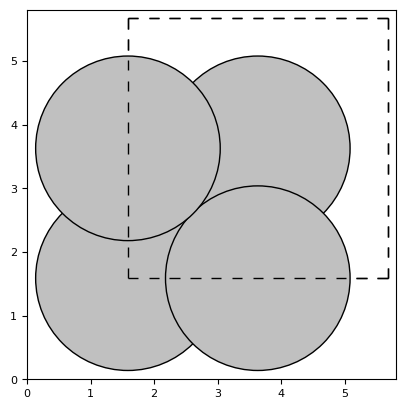

<Popen: returncode: None args: ['c:\\Users\\danie\\AppData\\Local\\Programs\...>

In [ ]:
from ase.build import bulk
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt

silver = bulk("Ag","fcc",a=4.08, cubic=True)
plot_atoms(silver)
plt.show()

silver = silver.repeat((1,2,2))
view(silver)



In [52]:
from mace.calculators import mace_mp
from ase.dft.dos import DOS
import matplotlib.pyplot as plt

Ag = bulk("Ag")
# view(Ag)
print(Ag.cell.get_bravais_lattice())

calc = mace_mp(model="small", device="cpu")
dos = DOS(calc, npts=500, width=0)
energies = dos.get_energies()
weights = dos.get_dos()
plt.plot(energies, weights)
plt.show()

FCC(a=4.09)
Using Materials Project MACE for MACECalculator with C:\Users\danie\.cache\mace/20231210mace128L0_energy_epoch249model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.


c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\mace\calculators\mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Using head Default out of ['Default']
Default dtype float32 does not match model dtype float64, converting models to float32.


AttributeError: 'MACECalculator' object has no attribute 'get_k_point_weights'